In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from IPython.display import SVG

In [39]:
BASE = '../'

# data = pd.read_csv('../data/molbank/Img2Mol/staker/staker.csv')
data = pd.read_csv('../data/molbank/Img2Mol/CLEF.csv')
pred = pd.read_csv('../output/uspto/swin_base_aux_1m_ep25/prediction_CLEF.csv')
# data = pd.read_csv('../data/molbank/real-acs-evaluation/acs.csv')
# pred = pd.read_csv('../output/uspto/swin_base_aux_1m_new2/prediction_acs.csv')
osra_pred = pd.read_csv('../data/molbank/Img2Mol/OCSR_Review/assets/results/CLEF/osra/prediction.csv')

--------------------
83
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070117785A1_p0008_x0478_y0710_c00002.png
gold: 
post: *C1=NN(CN2Cc([6*])c(*)([W]C)CC2[5*])C([7*])=C1[8*]
grph: <invalid>
pred: [5*]C1Cc([Rc])([W][Ar2])c([6*])CN1[G]N1N=C([Ar])C([8*])=C1[7*]
(293, 569, 3)


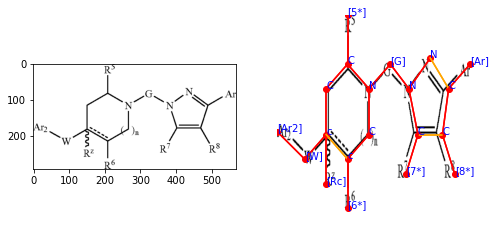

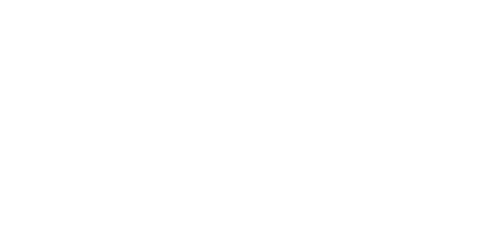

post: *C1=NN(CN2Cc([6*])c(*)([W]C)CC2[5*])C([7*])=C1[8*]
graph: <invalid>
--------------------
212
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20050043351A1_p0001_x1536_y1025_c00000.png
gold: 
post: *CC(=C)C(*)(*)c1c([7*])c([6*])c([5*])c2c1C=CCC2
grph: *CC(=C)C(*)(*)c1c([7*])c([6*])c([5*])c2ccccc12
pred: *<unk>(*)(C(=[Z1])[Z2][Ar])C1=C([R7])C([R6])=C([R5])C2=C1[X1]=[X2][X3][X4]2
(391, 386, 3)


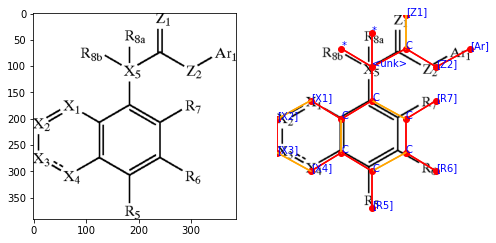

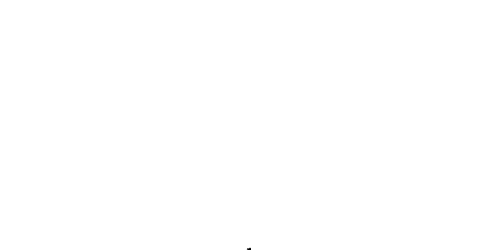

post: *CC(=C)C(*)(*)c1c([7*])c([6*])c([5*])c2c1C=CCC2
graph: *CC(=C)C(*)(*)c1c([7*])c([6*])c([5*])c2ccccc12
--------------------
215
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20050009817A1_p0035_x0383_y0697_c00101.png
gold: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
post: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
grph: O=C(O)CCC(=O)c1cn(C2=NC(c3ccccn3)C3C=C(c4ccco4)C=CC3=N2)c2ccc(Br)cc12
pred: C1C=C(C2N=C(N3C4C=CC(Br)=CC=4C(C(CC[CO2H])=O)=C3)N=C3C=2C=C(C2OC=CC=2)C=C3)N=CC=1
(545, 783, 3)


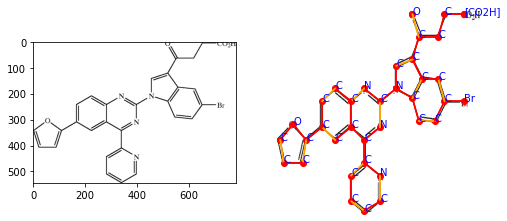

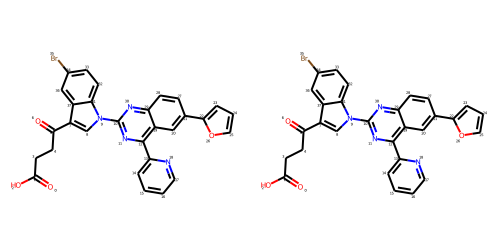

post: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
graph: O=C(O)CCC(=O)c1cn(C2=NC(c3ccccn3)C3C=C(c4ccco4)C=CC3=N2)c2ccc(Br)cc12
--------------------
249
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20040186132A1_p0003_x1460_y0591_c00003.png
gold: c1cnc2cc3oc4ccccc4c3cc2c1
post: I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.c1cnc2cc3oc4ccccc4c3cc2c1
grph: I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.c1cnc2cc3oc4ccccc4c3cc2c1
pred: C1=CC2=C(C=C1)OC1=C2C=C2C=CC=NC2=C1.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.

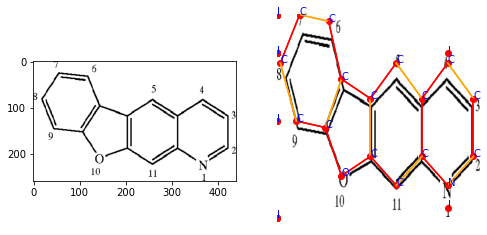

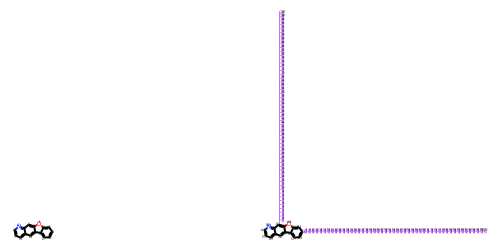

post: I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.c1cnc2cc3oc4ccccc4c3cc2c1
graph: I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.I.c1cnc2cc3oc4ccccc4c3cc2c1
--------------------
483
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20040229890A1_p0013_x0390_y0672_c00055.png
gold: Nc1nc(NCCOCc2ccccc2)c2c(cc(-c3ccccc3C(F)(F)F)c3c2ccn3CCOCc2ccccc2)n1
post: C1C=CC(COCCNC2C3C(=CC(C4C=CC=CC=4C(F)(F)F)=C4N(CCOCC5C=CC=CC=5)C=CC3=34)N=C(N)N=2)=CC=1
grph: Nc1nc(NCCOCc2ccccc2)c2c(cc(-c3ccccc3C(F)(F)F)c3c2ccn3CCOCc2ccccc2)n1
pred: C1C=CC(COCCNC2C3C(=CC(C4C=CC=CC=4C(F)(F)F)=C4N(CCOCC5C=CC=CC=5)C=CC3=34)N=C(N)N=2)=CC=1
(604, 772, 3)


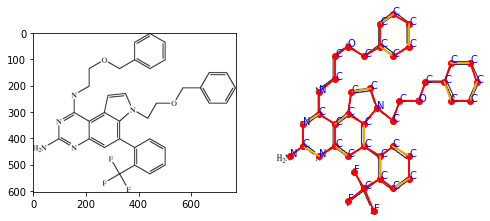

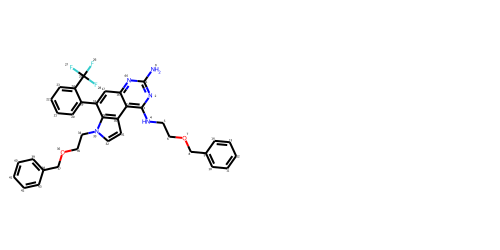

post: C1C=CC(COCCNC2C3C(=CC(C4C=CC=CC=4C(F)(F)F)=C4N(CCOCC5C=CC=CC=5)C=CC3=34)N=C(N)N=2)=CC=1
graph: Nc1nc(NCCOCc2ccccc2)c2c(cc(-c3ccccc3C(F)(F)F)c3c2ccn3CCOCc2ccccc2)n1
--------------------
578
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070270434A1_p0021_x0352_y0784_c00052.png
gold: C[C@H]1CN(C(=O)Cc2ccc(C(F)(F)F)cc2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
post: CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)CC(C)N1S(=O)(=O)C1=CC=CC2=C=1CC(C(=O)O)C2.CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)CC(C)N1S(=O)(=O)C1=CC=CC2=C=1CC(C(=O)O)C2.FF.FF.FF
grph: CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)C23C(C)N1S1(C4=CC=CC5CC(C(=O)O)CC=45)=O=S(=O)(=O)(C4=CC=CC5CC(C(=O)O)CC=45)(=O=1)N1C(C)CN2(C(=O)CC2=CC=C(C(F)(F)F)C=C2)C[CH]13C.FF.FF.FF
pred: C[C@H]1CN(C(CC2=CC=C([CF3])C=C2)=O)C[C@H](C)N1S(C1=C2CC(C(O)=O)CC=2C=CC=1)(=O)=O.C[C@H]1CN(C(CC2=CC=C([CF3])C=C2)=O)C[C@H](C)N1S(C1=C2CC(C(O)=O)CC=2C=CC=1)(=O)=O.FF.FF.FF
(451, 845, 3)


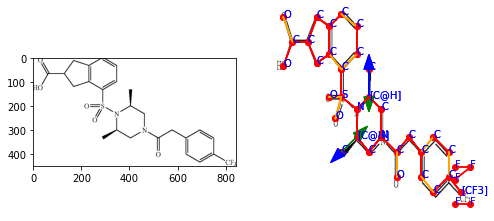

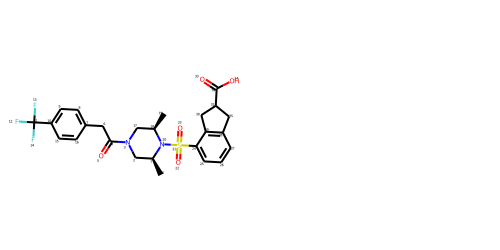

post: CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)CC(C)N1S(=O)(=O)C1=CC=CC2=C=1CC(C(=O)O)C2.CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)CC(C)N1S(=O)(=O)C1=CC=CC2=C=1CC(C(=O)O)C2.FF.FF.FF
graph: CC1CN(C(=O)CC2=CC=C(C(F)(F)F)C=C2)C23C(C)N1S1(C4=CC=CC5CC(C(=O)O)CC=45)=O=S(=O)(=O)(C4=CC=CC5CC(C(=O)O)CC=45)(=O=1)N1C(C)CN2(C(=O)CC2=CC=C(C(F)(F)F)C=C2)C[CH]13C.FF.FF.FF
--------------------
637
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070270434A1_p0023_x0335_y2193_c00062.png
gold: C[C@H]1CN(CCc2ccc(SC(F)(F)F)cc2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
post: C[C@H]1CN(CCc2ccc(SC(F)(F)F)cc2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2.FCF.FCF
grph: CC=CC1=C(CS(=O)(=O)N2[C@@H](C)CN(CCc3ccc(SC(F)(F)F)cc3)C[C@H]2C)CC(C(=O)O)C1.FCF.FCF
pred: C[C@H]1CN(CCC2=CC=C(S[CF3])C=C2)C[C@H](C)N1S(C1C2CC(C(O)=O)CC=2C=CC=1)(=O)=O.FCF.FCF
(323, 879, 3)


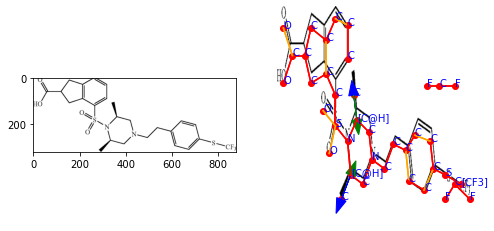

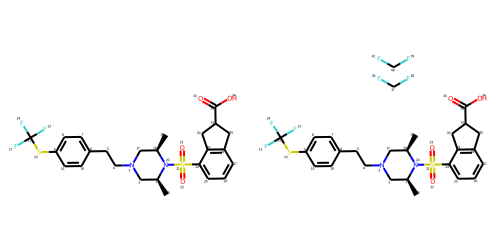

post: C[C@H]1CN(CCc2ccc(SC(F)(F)F)cc2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2.FCF.FCF
graph: C/C=C\C1=C(CS(=O)(=O)N2[C@@H](C)CN(CCc3ccc(SC(F)(F)F)cc3)C[C@H]2C)CC(C(=O)O)C1.FCF.FCF
--------------------
729
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070270434A1_p0021_x0352_y1955_c00053.png
gold: C[C@H]1CN(CCc2ccc(C(F)(F)F)cc2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
post: C[C@H]1CN(CCc2cccc3c2CC(C(=O)O)C3)C[C@H](C)N1S(=O)(=O)c1ccc(C(F)(F)F)cc1.Cc1ccc(CCc2ccc(C(F)(F)F)cc2)cc1
grph: C[CH]CN(CCc1cccc2c1CC(C(=O)O)C2)C[C@H](C)NS(=O)(=O)c1ccc(C(F)(F)F)cc1.Cc1ccc(CCc2ccc(C(F)(F)F)cc2)cc1
pred: CC1=CC=C(CCC2=CC=C(C(F)(F)F)C=C2)C=C1.C[C@H]1CN(CCC2=CC=CC3=C2CC(C(=O)O)C3)C[C@H](C)N1S(=O)(=O)C1=CC=C(C(F)(F)F)C=C1
(451, 845, 3)


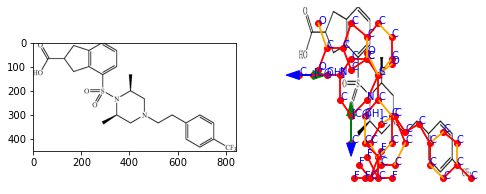

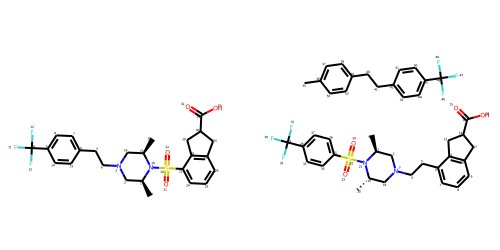

post: C[C@H]1CN(CCc2cccc3c2CC(C(=O)O)C3)C[C@H](C)N1S(=O)(=O)c1ccc(C(F)(F)F)cc1.Cc1ccc(CCc2ccc(C(F)(F)F)cc2)cc1
graph: C[CH]CN(CCc1cccc2c1CC(C(=O)O)C2)C[C@H](C)NS(=O)(=O)c1ccc(C(F)(F)F)cc1.Cc1ccc(CCc2ccc(C(F)(F)F)cc2)cc1
--------------------
769
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20050054819A1_p0014_x0404_y2710_c00045.png
gold: 
post: CCCCC(N=o)C(=O)OC
grph: <invalid>
pred: CCCC[C@H](N=o)C(OC)=O
(210, 301, 3)


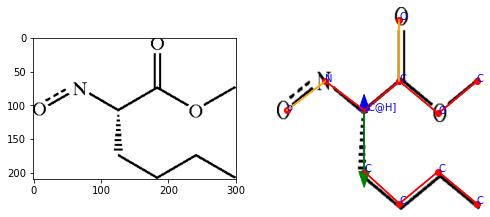

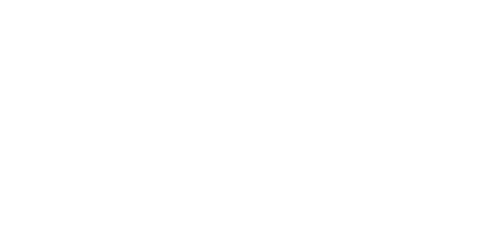

post: CCCCC(N=o)C(=O)OC
graph: <invalid>
--------------------
781
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070270434A1_p0023_x1376_y2632_c00065.png
gold: C[C@H]1CN(CCc2ccc(C(F)(F)F)c(F)c2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
post: C[C@H]1CN(CCc2ccc(C(F)(F)F)c(F)c2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
grph: C[CH]CN(CCc1ccc(C(F)(F)F)c(F)c1)C[C@H](C)NS(=O)(=O)c1cccc2c1CC(C(=O)O)C2
pred: C[C@H]1CN(CCC2=CC=C(C(F)(F)F)C(F)=C2)C[C@H](C)N1S(=O)(=O)C1=CC=CC2=C1CC(C(=O)O)C2
(417, 784, 3)


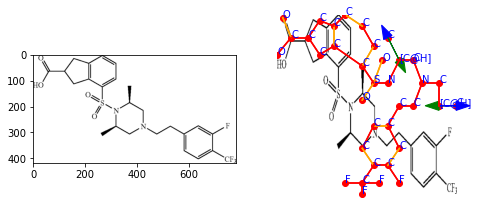

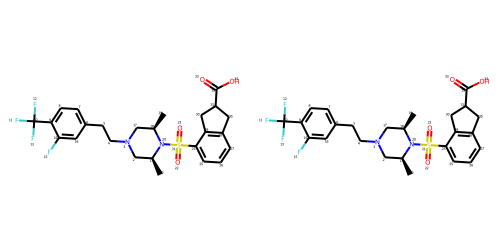

post: C[C@H]1CN(CCc2ccc(C(F)(F)F)c(F)c2)C[C@@H](C)N1S(=O)(=O)c1cccc2c1CC(C(=O)O)C2
graph: C[CH]CN(CCc1ccc(C(F)(F)F)c(F)c1)C[C@H](C)NS(=O)(=O)c1cccc2c1CC(C(=O)O)C2
--------------------
860
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20060122222A1_p0016_x0409_y0634_c00045.png
gold: CC(C)(C)OC(=O)NC(CSCc1ccc(-c2ccc(-c3cccc4c3oc3ccccc34)cc2)s1)C(=O)O
post: CC(C)(OC(NC(CSCC1SC(C2C=CC(C3C=CC=C4C5C=CC=CC=5OC3=34)=CC=2)=CC=1)C(O)=O)=O)C
grph: CC(C)(C)OC(=O)NC(CSCc1ccc(-c2ccc(-c3cccc4c3oc3ccccc34)cc2)s1)C(=O)O
pred: CC(C)(OC(NC(CSCC1SC(C2C=CC(C3C=CC=C4C5C=CC=CC=5OC3=34)=CC=2)=CC=1)C(O)=O)=O)C
(404, 938, 3)


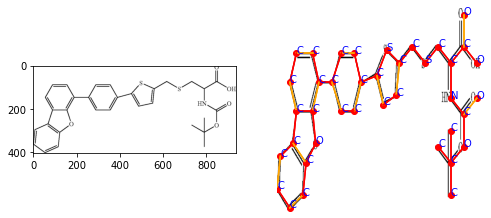

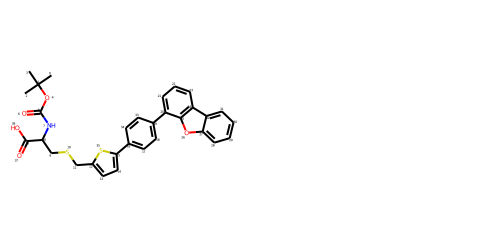

post: CC(C)(OC(NC(CSCC1SC(C2C=CC(C3C=CC=C4C5C=CC=CC=5OC3=34)=CC=2)=CC=1)C(O)=O)=O)C
graph: CC(C)(C)OC(=O)NC(CSCc1ccc(-c2ccc(-c3cccc4c3oc3ccccc34)cc2)s1)C(=O)O
--------------------
889
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20050009817A1_p0034_x0383_y1634_c00099.png
gold: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
post: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
grph: O=C(O)CCC(=O)c1cn(C2=NC(c3ccccn3)C3C=C(c4ccco4)C=CC3=N2)c2ccc(Br)cc12
pred: C1C=C(C2N=C(N3C4C=CC(Br)=CC=4C(C(CC[CO2H])=O)=C3)N=C3C=2C=C(C2OC=CC=2)C=C3)N=CC=1
(546, 783, 3)


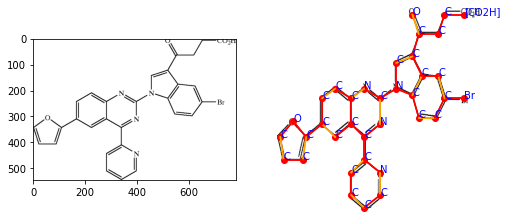

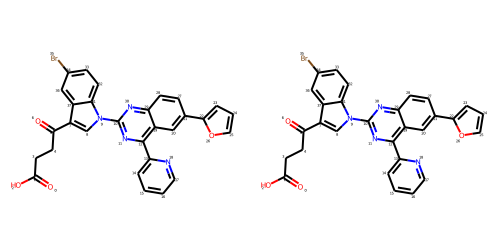

post: O=C(O)CCC(=O)c1cn(-c2nc(-c3ccccn3)c3cc(-c4ccco4)ccc3n2)c2ccc(Br)cc12
graph: O=C(O)CCC(=O)c1cn(C2=NC(c3ccccn3)C3C=C(c4ccco4)C=CC3=N2)c2ccc(Br)cc12
--------------------
914
data/molbank/Img2Mol/OCSR_Review/assets/images/CLEF/US20070179154A1_p0031_x1376_y1739_c00014.png
gold: Cc1cc2c(-c3cccc(Br)c3)c(CC(=O)Nc3ccc(F)cc3C(F)(F)F)c(=O)oc2cc1Cl
post: Cc1cc2c(-c3cccc(Br)c3)c(CC(=O)Nc3ccc(F)cc3C(F)(F)F)c(=O)oc2cc1Cl.Cc1cc2c(-c3cccc(Br)c3)c(CC(=O)Nc3ccc(F)cc3C(F)(F)F)c(=O)oc2cc1Cl
grph: [H]N(C(=O)CC1=C(C2=CC(Br)=CC=C2)C2=CC(C)=C(Cl)C=C2OC1=O)C1=C(C(F)(F)F)(=C2(N([H])C(=O)CC3=C(C4=CC(Br)=CC=C4)C4=CC(C)=C(Cl)C=C4OC3=O)=C(C(F)(F)F)C=C(F)C=C2)C=C(F)C=C1
pred: [H]N(C(CC1C(=O)OC2=CC(Cl)=C(C)C=C2C=1C1=CC(Br)=CC=C1)=O)C1C=CC(F)=CC=1[CF3].[H]N(C(CC1C(=O)OC2=CC(Cl)=C(C)C=C2C=1C1C=CC=C(Br)C=1)=O)C1C=CC(F)=CC=1[CF3]
(353, 741, 3)


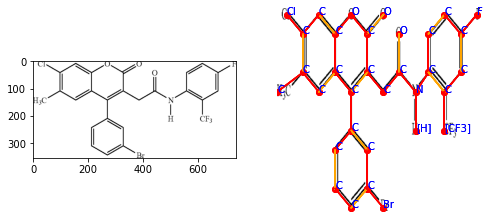

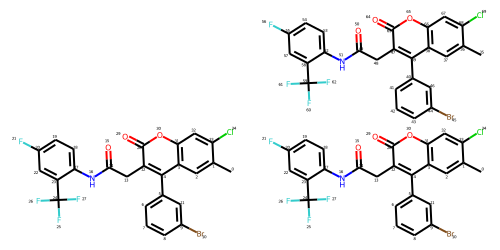

post: [H]N(C(=O)Cc1c(-c2cccc(Br)c2)c2cc(C)c(Cl)cc2oc1=O)c1ccc(F)cc1C(F)(F)F.[H]N(C(=O)Cc1c(-c2cccc(Br)c2)c2cc(C)c(Cl)cc2oc1=O)c1ccc(F)cc1C(F)(F)F
graph: [H]N(C(=O)CC1=C(C2=CC(Br)=CC=C2)C2=CC(C)=C(Cl)C=C2OC1=O)C1=C(C(F)(F)F)(=C2(N([H])C(=O)CC3=C(C4=CC(Br)=CC=C4)C4=CC(C)=C(Cl)C=C4OC3=O)=C(C(F)(F)F)C=C(F)C=C2)C=C(F)C=C1


In [40]:
from bms.chemistry import canonicalize_smiles, _expand_functional_group, _postprocess_smiles, _convert_graph_to_smiles
from bms.augment import CropWhite
import albumentations as A
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 600,600

transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])

cnt = 0 
for i, row in data.iterrows():
    gold_smiles,_ = canonicalize_smiles(row['SMILES'], ignore_cistrans=True)
    post_smiles,_ = canonicalize_smiles(pred.loc[i,'post_SMILES'], ignore_cistrans=True)
    pred_smiles = pred.loc[i,'SMILES']
    graph_smiles,_ = canonicalize_smiles(pred.loc[i,'graph_SMILES'], ignore_cistrans=True)
#     assert osra_pred.loc[i, 'image_id'] == row['image_id']
#     osra_smiles, _ = canonicalize_smiles(osra_pred.loc[i, 'SMILES'], ignore_cistrans=True)
#     if gold_smiles != post_smiles:
#         continue
    if graph_smiles == post_smiles:
        continue
    print('-' * 20)
    cnt += 1
    print(i)
    print(row['file_path'])
    print('gold:', gold_smiles)
    print('post:', post_smiles)
    print('grph:', graph_smiles)
    print('pred:', pred_smiles)
#     print('osra:', osra_smiles, osra_smiles == gold_smiles)
    file = str(row['file_path'])
    path = BASE + file if file.startswith('data') else '../data/molbank/'+file
    image = cv2.imread(path)
    print(image.shape)
#     print(pred.loc[i,'molblock'])
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
#     plt.axis('off')
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.axis('off')
    img = transform(image=image)['image']
    plt.imshow(img)
    if 'node_coords' in pred.columns:
        coords = np.array(eval(pred.loc[i, 'node_coords']))
        symbols = eval(pred.loc[i, 'node_symbols'])
        edges = eval(pred.loc[i, 'edges'])
        h, w, _ = img.shape
        x, y = coords[:,0]*w, coords[:,1]*h
        plt.scatter(x, y, color='r', marker='o')
        for i in range(len(symbols)):
            plt.text(x[i], y[i], symbols[i], color='blue')
        for i in range(len(x)):
            for j in range(len(x)):
                if edges[i][j] != 0:
                    if edges[i][j] in [5, 6]:
                        color = 'blue' if edges[i][j] == 5 else 'green'
                        plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
                    else:
                        color = 'red' if edges[i][j] == 1 else 'orange'
                        plt.plot([x[i], x[j]], [y[i], y[j]], color)
    plt.show()
    mol = Chem.MolFromSmiles(post_smiles)
    mol1 = Chem.MolFromSmiles(gold_smiles)
    svg = Draw.MolsToGridImage([mol1,mol], subImgSize=(250,250), molsPerRow=2, useSVG=True)
    display(svg)
    post_smiles, *_ =  _postprocess_smiles(pred_smiles, coords, symbols, edges, debug=False)
    print('post:', post_smiles)
    graph_smiles, *_ = _convert_graph_to_smiles(coords, symbols, edges, debug=False)
    print('graph:', graph_smiles)
    if cnt == 20:
        break

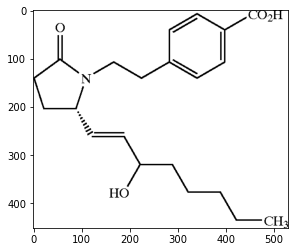

Gold: CCCCCC(O)/C=C/[C@@H]1CCC(=O)N1CCc1ccc(C(=O)O)cc1
Pred: CCCCCC(O)/C=C/[C@H]1N(CCC2C=CC([CO2H])=CC=2)C(=O)CC1
Post: CCCCCC(O)C=C[C@@H]1CCC(=O)N1CCc1ccc(C(=O)O)cc1


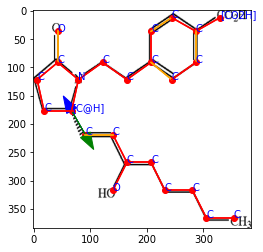

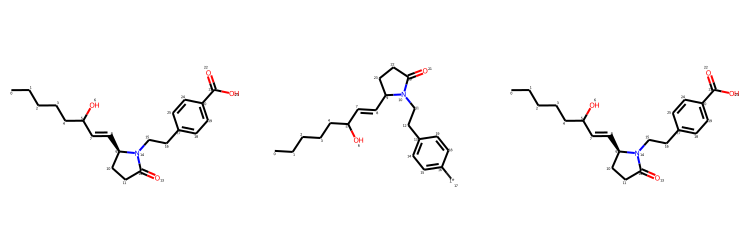

[(5, '?'), (9, '?')]
[[0.921, 0.952], [0.794, 0.952], [0.73, 0.825], [0.603, 0.825], [0.54, 0.698], [0.429, 0.698], [0.365, 0.825], [0.365, 0.571], [0.238, 0.571], [0.175, 0.46], [0.206, 0.317], [0.317, 0.238], [0.429, 0.317], [0.54, 0.238], [0.54, 0.095], [0.635, 0.032], [0.746, 0.095], [0.857, 0.032], [0.746, 0.238], [0.635, 0.317], [0.111, 0.238], [0.111, 0.095], [0.016, 0.317], [0.048, 0.46]]
['C', 'C', 'C', 'C', 'C', 'C', 'O', 'C', 'C', '[C@H]', 'N', 'C', 'C', 'C', 'C', 'C', 'C', '[CO2H]', 'C', 'C', 'C', 'O', 'C', 'C']
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 

In [37]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
from bms.chemistry import _verify_chirality, _postprocess_smiles, _replace_functional_group, _convert_graph_to_smiles, canonicalize_smiles
from bms.augment import CropWhite
import albumentations as A

i = 43
gold_smiles = data.loc[i, 'SMILES']
if gold_smiles is None or type(gold_smiles) is not str:
    gold_smiles = ''
# path = '../data/molbank/' + data.loc[i, 'file_path']
path = '../' + data.loc[i, 'file_path']
img = cv2.imread(path)
plt.imshow(img)
plt.show()
transform = A.Compose([CropWhite(pad=0), A.Resize(384,384)])
img = transform(image=img)['image']

pred_row = pred.loc[i]
pred_smiles = pred_row['SMILES']
post_smiles = pred_row['post_SMILES']

print('Gold:', canonicalize_smiles(gold_smiles)[0])
print('Pred:', pred_smiles)
print('Post:', post_smiles)

coords = eval(pred_row['node_coords'])
symbols = eval(pred_row['node_symbols'])
edges = eval(pred_row['edges'])

plt.imshow(img)
h,w,_ = img.shape
x, y = np.array(coords)[:,0]*w, np.array(coords)[:,1]*h
plt.scatter(x, y, color='r', marker='o')
for i in range(len(symbols)):
    plt.text(x[i], y[i], symbols[i], color='blue')
for i in range(len(x)):
    for j in range(len(x)):
        if edges[i][j] != 0:
            if edges[i][j] in [5, 6]:
                color = 'blue' if edges[i][j] == 5 else 'green'
                plt.arrow(x[i], y[i], x[j]-x[i], y[j]-y[i], color=color, head_width=20)
            else:
                if edges[i][j] == 1:
                    color = 'red'
                elif edges[i][j] == 2:
                    color = 'orange'
                else:
                    color = 'yellow'
                plt.plot([x[i], x[j]], [y[i], y[j]], color)
plt.show()

mol_gold = Chem.MolFromSmiles(gold_smiles)
pred_smiles = pred_smiles.replace('@', '')
pred_smiles, mappings = _replace_functional_group(pred_smiles)
mol_pred = Chem.MolFromSmiles(pred_smiles)
mol_post = Chem.MolFromSmiles(post_smiles)
img = Chem.Draw.MolsToGridImage([mol_gold,mol_pred,mol_post], subImgSize=(250,250), molsPerRow=3, useSVG=True)
display(img)
if mol_pred is not None:
    chiral_centers = Chem.FindMolChiralCenters(mol_pred, includeUnassigned=True, includeCIP=False, useLegacyImplementation=False)
    print(chiral_centers)

print(coords)
print(symbols)
print(edges)

pred_smiles = pred_row['SMILES']
print(pred_smiles, flush=True)
smiles, *_ = _postprocess_smiles(pred_smiles, coords, symbols, edges, molblock=True, debug=True)
print('post:', smiles)

smiles, *_ = _convert_graph_to_smiles(coords, symbols, edges, debug=True)
print('graph:', smiles)

0 1 SINGLE NONE STEREONONE
1 2 SINGLE NONE STEREONONE
2 3 SINGLE NONE STEREONONE
3 4 SINGLE NONE STEREONONE
4 5 SINGLE NONE STEREONONE
5 6 SINGLE NONE STEREONONE
5 7 SINGLE ENDUPRIGHT STEREONONE
7 8 DOUBLE NONE STEREOE
8 9 SINGLE ENDUPRIGHT STEREONONE
9 10 SINGLE NONE STEREONONE
10 11 SINGLE NONE STEREONONE
11 12 SINGLE NONE STEREONONE
12 13 DOUBLE NONE STEREONONE
12 14 SINGLE NONE STEREONONE
14 15 SINGLE NONE STEREONONE
15 16 SINGLE NONE STEREONONE
16 17 SINGLE NONE STEREONONE
17 18 AROMATIC NONE STEREONONE
18 19 AROMATIC NONE STEREONONE
19 20 AROMATIC NONE STEREONONE
20 21 SINGLE NONE STEREONONE
21 22 DOUBLE NONE STEREONONE
21 23 SINGLE NONE STEREONONE
20 24 AROMATIC NONE STEREONONE
24 25 AROMATIC NONE STEREONONE
14 9 SINGLE NONE STEREONONE
25 17 AROMATIC NONE STEREONONE


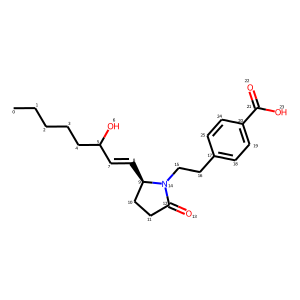

In [29]:
mol = Chem.MolFromSmiles('CCCCCC(O)/C=C/[C@@H]1CCC(=O)N1CCc1ccc(C(=O)O)cc1')
for bond in mol.GetBonds():
    print(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond.GetBondType(), bond.GetBondDir(), bond.GetStereo())
mol